# Sello rojo

Libreta de análisis de los datos pertenecientes a la base de datos de la compañia Sello rojo para el año de 2017  

In [11]:
%matplotlib inline
import mysql.connector
import pandas as pd 
import numpy as np 
from gpcharts import figure
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
#conección a la base de datos 
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    auth_plugin='mysql_native_password',
    passwd = "toor",
    db = "sello_rojo"
    )
print(mydb)

## Comenzamos a hacer uso de la conexión con la base

#### Comenzamos con una gráfica que nos muestre el total de las ventas por mes.

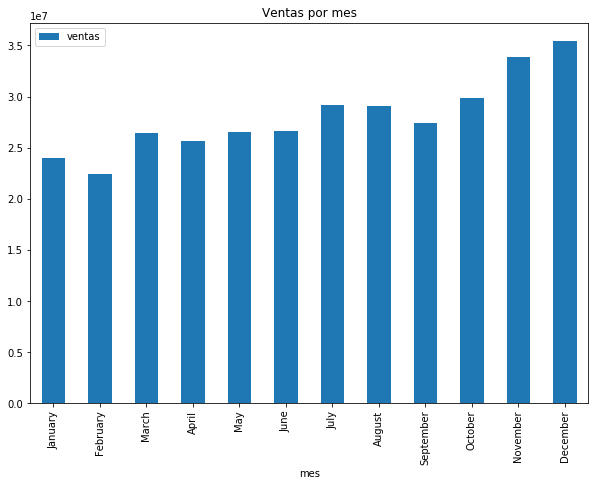

In [39]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM ventas_mes")
df = pd.DataFrame(cursor)
df.columns = ["ventas","mes"]
df["ventas"] = df["ventas"].astype(float)
#df.head
df.plot(kind="bar",x = "mes" ,title="Ventas por mes",figsize=(10,7) )

In [40]:
#plt.figure(figsize=(7,7))
#plt.scatter(df["mes"], df["ventas"],)

gr = figure('Ventas por mes')
gr.ylabel="ventas"
gr.xlabel="meses del año 2017"
(gr.scatter(df["ventas"], trendline=True))

#### Como podemos ver en la gráfica anterior la tendencia de nuestras ventas es positiva.

#### A continuación veremos una predicción para los siguientes tres meses


In [28]:

meses = meses.reshape(-1,1)
ventas = df["ventas"].to_numpy()
model = LinearRegression().fit(meses,ventas)
x_nuevo = np.array([13,14,15])
x_nuevo = x_nuevo.reshape(-1,1)
y_prediccion =model.predict(x_nuevo)
print("Las predicciones para ventas de los siguientes meses del año 2018 son:\nEnero:   {}\nFebrero: {}\nMarzo:   {}".format(y_prediccion[0],y_prediccion[1],y_prediccion[2]))

Las predicciones para ventas de los siguientes meses del año 2018 son:
Enero:   34236879.73590909
Febrero: 35189895.16297202
Marzo:   36142910.59003496


##### Pero sigamos viendo que más podemos descubrir, continuaremos encontrando aquellos productos que generaron  ventas mayores a 5 millones.




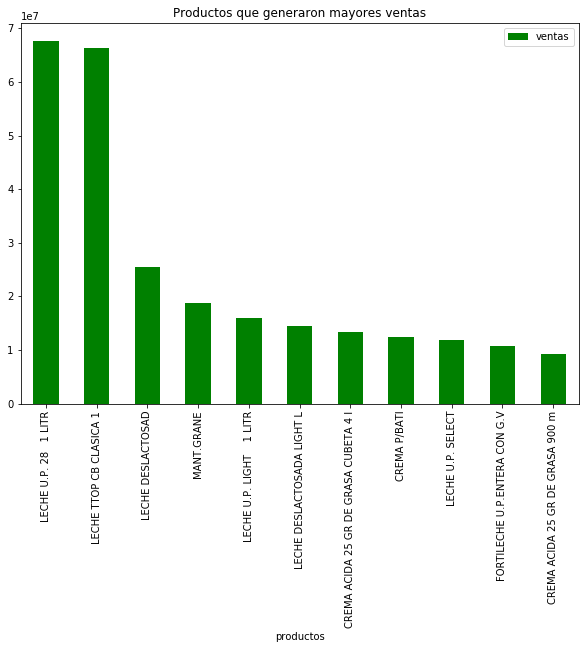

In [7]:
cursor.execute("SELECT * FROM ventas_prod")
df = pd.DataFrame(cursor)
df.columns = ["ventas","productos"]
df["ventas"] = df["ventas"].astype(float)
df.plot(kind="bar",x = "productos" ,title="Productos que generaron mayores ventas", colormap = "ocean",figsize=(10,7))

##### Continuemos con el número de ventas por estado registrado.

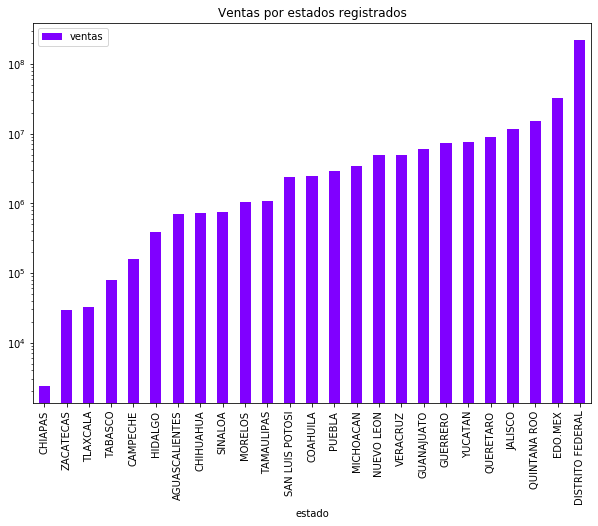

In [8]:
cursor.execute("SELECT * FROM ventas_estado")
df = pd.DataFrame(cursor)
df.columns = ["ventas","estado"]
df["ventas"] = df["ventas"].astype(float)
#df.plot.pie(y = "ventas", figsize = (15,15))
df.plot(kind="bar",x = "estado" ,title="Ventas por estados registrados", colormap = "rainbow",logy = True ,use_index = True,figsize=(10,7))


Para la gráfica anterior **tomar en cuenta la escala** ya que va siendo modificada para poder ver todas las columnas ya que la columna del Distrito Federal se aleja mucho del resto.

### Las siguientes graficas muestran los 5 productos que más se vendieron en los 6 estados que registraron mayores ventas 

In [9]:
cursor.execute("SELECT * FROM prod_est")
df = pd.DataFrame(cursor)
df.columns = ["ventas","SKU","estado"]
df["ventas"] = df["ventas"].astype(float)
graf = figure("r")
graf.ylabel = 'Estados'
estados = pd.unique(df["estado"]).tolist()
#x[0:0]=["estados"]
def dibujar(plt, aux,estado):
    plt.barh(aux["SKU"], width = aux["ventas"], align = "edge",color = "y")
    plt.set_xlabel("ventas")
    plt.set_ylabel("productos")
    plt.set_title(estado)

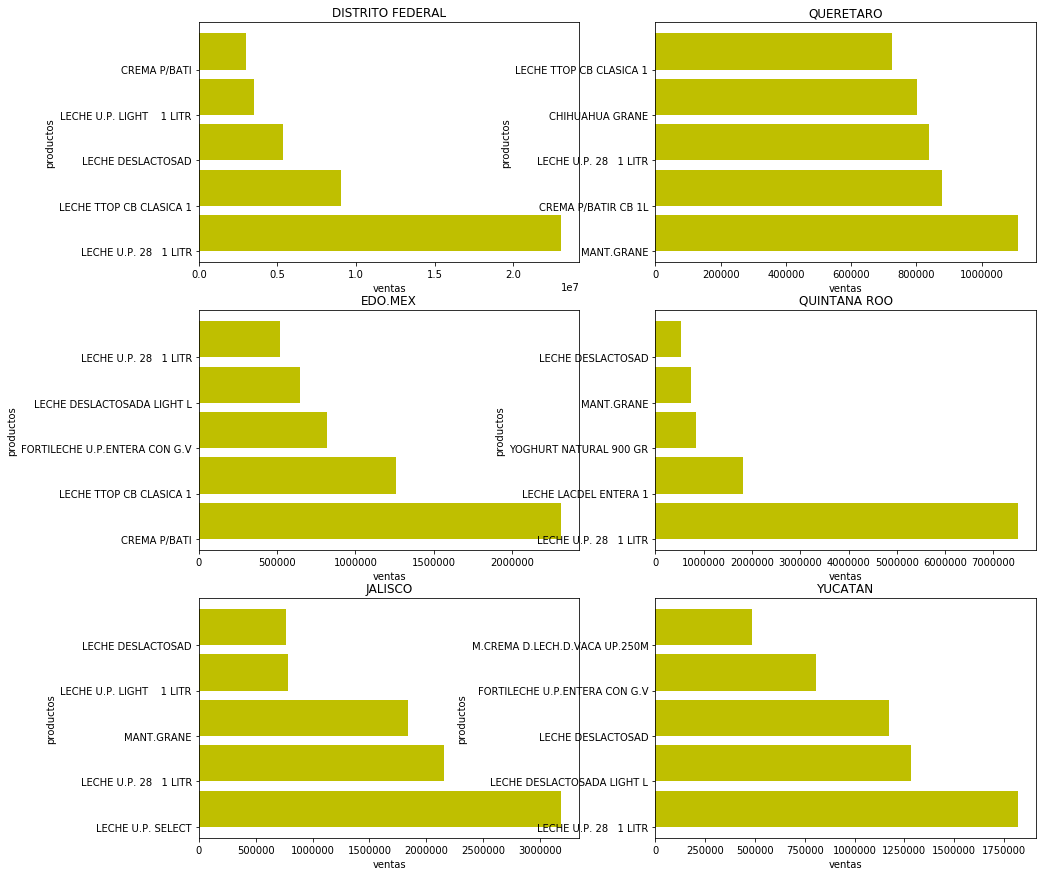

In [10]:
fig, axs = plt.subplots(3, 2,figsize=(15,15))
x = 0
y = 0
for estado in estados:
    aux = df[df['estado'] == estado ][['SKU','ventas']]
    dibujar(axs[x,y],aux,estado)
    x = x + 1
    if x > 2:
        x = 0
        y = y +1
    